<a href="https://colab.research.google.com/github/DotBion/techgb2336-dataSciBiz/blob/main/Copy_of_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2: Predicting Patient No-Shows

### Background

You've been hired as the manager of SHMC, a medical center in Brazil. As part of its business model, SHMC usually employs doctors on demand, meaning that doctors are asked to come only when there are appointments. However, once a doctor has been asked to come, you must pay him or her regardless of whether the patient shows up or not. You want to use data on previous appointments to figure out whether you can predict which patients are going to show up, so that you can plan better how many doctors to call.

[The data can be downloaded at this link.](https://drive.google.com/uc?download=export&id=1iM0CSzfNckc565zwpb4VpHjEVLgckLPE)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

**1. Load the data referenced by the path above into a pandas data frame. Comment on the total number of rows and columns, and show the first few rows in the dataset.**

In [2]:
noshows = pd.read_csv('SHMC_NoShows.csv')

print(noshows.shape)
noshows.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here's a brief summary of the features in the data:

1. PatientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or female.
4. ScheduledDay - The day someone called or registered the appointment.
6. AppointmentDay - The day of the actual appointment, when the patient has to visit the doctor.
7. Age = How old is the patient.
8. Neighborhood - Place where the patient lives.
9. Scholarship - Whether the patient receives financial help.(0=No, 1=Yes)
10. Hypertension - Whether the patient suffers from hypertension.(0=No, 1=Yes)
11. Diabetes - Whether the patient suffers from diabetes.(0=No, 1=Yes)
12. Alcoholism - Whether the patient suffers from alcoholism.(0=No, 1=Yes)
13. Handicap - Whether the patient is handicapped (0=No, 1=Yes)
14. SMS_received - Whether 1 or more SMS messages were sent to the patient (0=No, 1=Yes)
15. No-show - Whether the patient missed the appointment.

### Exploratory Data Analysis

**2. Transform ScheduledDay and AppointmentDay into datetimes (Hint: Use pandas for this). What is the range of dates of the AppointmentDay?**

In [3]:
# prompt: Transform ScheduledDay and AppointmentDay into datetimes

noshows['ScheduledDay'] = pd.to_datetime(noshows['ScheduledDay'])
noshows['AppointmentDay'] = pd.to_datetime(noshows['AppointmentDay'])

print("Range:",noshows['AppointmentDay'].min(), noshows['AppointmentDay'].max())


Range: 2016-04-29 00:00:00+00:00 2016-06-08 00:00:00+00:00


**3. If you take a look at both dates, you will see that ScheduledDay includes a specific time with the date, but AppointmentDay doesn't. In order to compare both fields more easily, apply "normalize" to ScheduledDay (i.e., keep only the dates). Hint: See the [normalize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.normalize.html) method.**

In [4]:
print(noshows['ScheduledDay'][0],noshows['AppointmentDay'][0])
noshows['ScheduledDay'] = noshows['ScheduledDay'].dt.normalize()
print(noshows['ScheduledDay'][0],noshows['AppointmentDay'][0])

2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00
2016-04-29 00:00:00+00:00 2016-04-29 00:00:00+00:00


**4. Create a new feature called 'TimeInAdvance' which is the difference in days between ScheduledDay and AppointmentDay.  (you may need to apply `dt.days`  to a datetime object to make sure this is a numeric). What is the longest advance time that someone scheduled an appointment??**

In [5]:
noshows['TimeInAdvance'] = (noshows['AppointmentDay'] - noshows['ScheduledDay']).dt.days
print(noshows['TimeInAdvance'].max())

179


**5. Explore the data set using EDA functions we have discussed in class.  Look at each feature.  Do any of them contain missing or weird values or outliers that concern you, given the feature descriptions above?  Comment on any weird values you see in any of the columns? Remove observations that contain any strange observations you have no explanation for, and report on how many rows were removed.**

<Axes: >

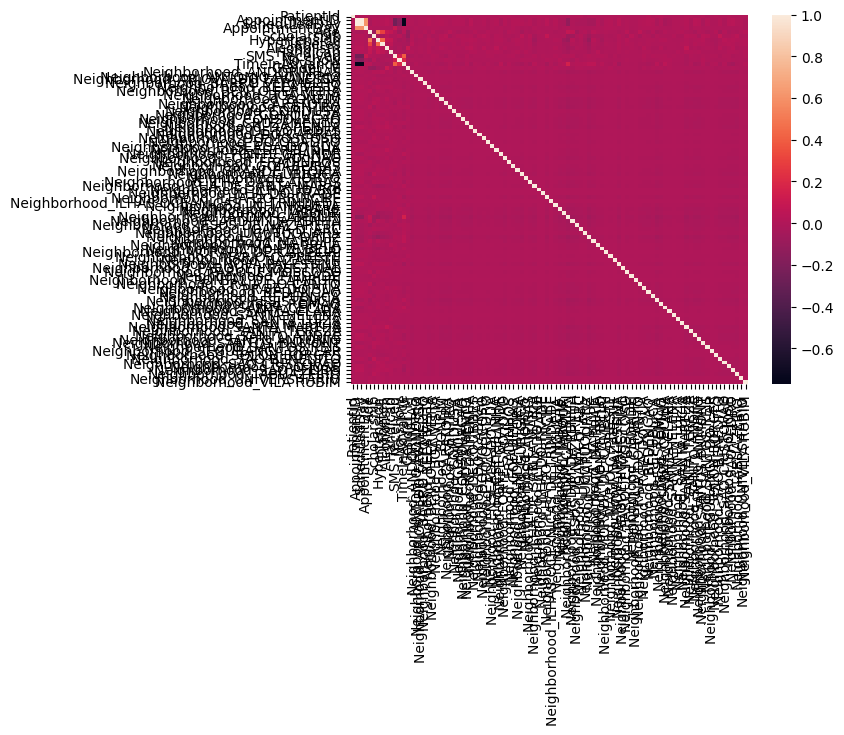

In [40]:
#changing the gender column to use the correlation function
#noshows['Gender'] = noshows['Gender'].replace({'M': 1, 'F': 0})
noshows_copy = noshows.copy()
noshows_copy = pd.get_dummies(noshows_copy, columns=['Gender','Neighborhood'], drop_first=True)
noshows_copy.head()
noshows_copy['No-show'] = noshows_copy['No-show'].map({'No': 0, 'Yes': 1})

corr = noshows_copy.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

#corr = noshows.corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,vmin=-1,vmax=1,cmap="RdBu")

In [33]:
#Removing negative TimeInAdvance values
rows_before = len(noshows)
noshows = noshows[noshows['TimeInAdvance'] >= 0]
rows_after = len(noshows)
print(f"Removed {rows_before - rows_after} rows with negative TimeInAdvance.")

Removed 5 rows with negative TimeInAdvance.


In [32]:
count_negative_timeinadvance = (noshows['TimeInAdvance'] < 0).sum()
print(count_negative_timeinadvance)
count_negative_ages = (noshows['Age'] < 0).sum()
print(count_negative_ages)

5
0


In [29]:
# prompt: Explore the data set using EDA functions we have discussed in class. Look at each feature. Do any of them contain missing or weird values or outliers that concern you, given the feature descriptions above? Comment on any weird values you see in any of the columns? Remove observations that contain any strange observations you have no explanation for, and report on how many rows were removed.

# Check for missing values
print(noshows.isnull().sum())

# Check data types and descriptive statistics
print(noshows.info())
print(noshows.describe())

# Explore individual features
print(noshows['Age'].value_counts()) # Check for unusual age values
print(noshows[noshows['Age'] < 0]) # Look at negative ages specifically

# Remove rows with negative ages
rows_before = len(noshows)
noshows = noshows[noshows['Age'] >= 0]
rows_after = len(noshows)
print(f"Removed {rows_before - rows_after} rows with negative ages.")


# Explore other features for inconsistencies (e.g., 'Gender', 'Scholarship', etc.)
print(noshows['Gender'].value_counts())
print(noshows['Scholarship'].value_counts())
print(noshows['Hypertension'].value_counts())
print(noshows['Diabetes'].value_counts())
print(noshows['Alcoholism'].value_counts())
print(noshows['Handicap'].value_counts())
print(noshows['SMS_received'].value_counts())
print(noshows['No-show'].value_counts())

# Examine 'TimeInAdvance' for unusual values
print(noshows['TimeInAdvance'].describe())
print(noshows[noshows['TimeInAdvance'] < 0]) # Check for negative time differences


#Further Investigation (example)
#If there are any values that seem odd, investigate and comment on them.
#Example: If you find a patient with an extremely high age or negative TimeInAdvance
#Consider removing those as well or adjusting them.
#This would be an example of how to remove outliers based on other factors
# rows_before = len(noshows)
# noshows = noshows[(noshows['TimeInAdvance'] >= 0)]
# rows_after = len(noshows)
# print(f"Removed {rows_before - rows_after} rows with negative TimeInAdvance.")

#Visualizations for Outlier Detection
#plt.figure(figsize=(10, 6))
#sns.boxplot(x=noshows['Age'])
#plt.show()




PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighborhood      0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
TimeInAdvance     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighborhood    110527 non-null  object             
 7   Scholarship     110527 non-null  int64           

In [25]:
#checking for missing values
na_count=noshows.isna().sum()
na_count

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighborhood,0
Scholarship,0
Hypertension,0
Diabetes,0


In [28]:
print(noshows['ScheduledDay'].max())
print(noshows['AppointmentDay'].max())
print(noshows['ScheduledDay'].min())
print(noshows['AppointmentDay'].min())

#negative age values are not practical, 0 is possible for child less than a year old.
print(noshows['Age'].min())
count_negative_ages = (noshows['Age'] < 0).sum()
print(count_negative_ages)
#negative values for TimeInAdvance shows that the appointment dates are before the scheduling dates: why ?
print(noshows['TimeInAdvance'].min())
count_negative_timeinadvance = (noshows['TimeInAdvance'] < 0).sum()
print(count_negative_timeinadvance)


2016-06-08 00:00:00+00:00
2016-06-08 00:00:00+00:00
2015-11-10 00:00:00+00:00
2016-04-29 00:00:00+00:00
-1
1
-6
5


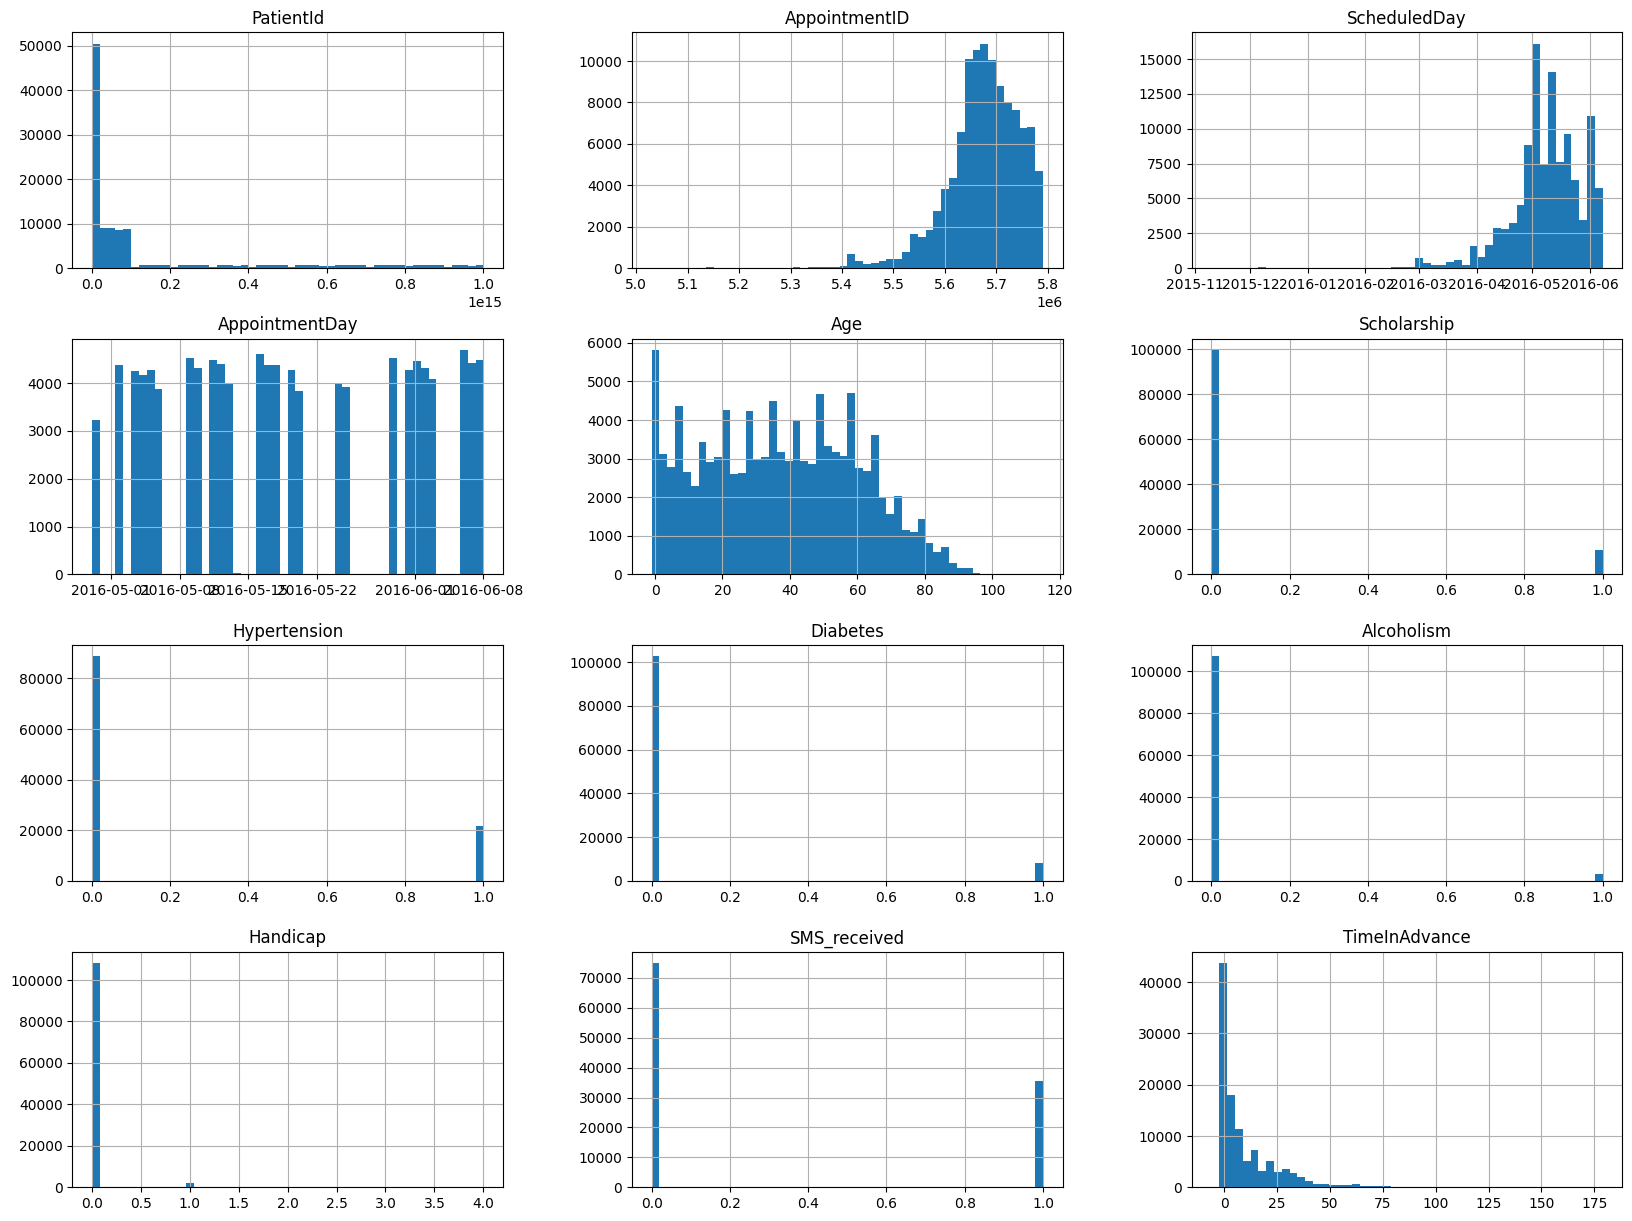

In [10]:
noshows.hist(bins=50, figsize=(20, 15))
#noshows.hist(bins=15, edgecolor='black', grid=False, figsize=(15, 10), layout=(5, 5))
plt.show()

**6. Create a new column called "IsFemale" that is 1 if the patient is female and 0 otherwise. Also, drop the Gender column.**

**7. Do the same for the No-show variable. It should be 1 if the person didn't show and 0 otherwise.**

**8. Now we explore the `Neighborhood` feature.  It is a categorical with many levels (as can be seen from `value_counts`).  To simplify the analysis we are going to create a new verison of `Neighborhood` by re-labelling any neighborhoods that appear LESS THAN 2000 times and give them the label Neighborhood="OTHER".  Show a table of value_counts of your *new* Neighborhood feature.**

**9. Create dummy variables for your new Neighborhood feature, add the dummies to your data frame, and then drop the original Neighborhood column from the data frame. Print a `head()` of your new data frame.**

**10. There are many patients that have made more than one appointment. This data set contains multiple observations per person, so we can use their past appointments as features in predicting whether the current appointment will be a no-show.**

**For example, the fact that a patient has failed to show up in the past may be predictive of the patient not showing up in the future. We want to create a variable that calculates the number of no_shows BEFORE the current appointment.**

**Create a new column called "PreviousNoShows" that for each appointment includes the number of *previous* appointments to which the patient did not show. For example, if the person did not show to the first meeting, PreviousNoShows should be 0 for the first appointment and 1 for the second one (if there is any). (We have provided sample code for this part below, but take a look at it to see if it makes sense to you, and edit to use your data frame name).**

**Now, create a line plot showing - for each value of PreviousNoShows, what is the percent No-Shows for the current appointment.  Does there seem to be a relationship? That is, does the number of PREVIOUS no-shows seem to be predictive of a no-show for the CURRENT appointment?  Comment.**

In [6]:
## sample code for calculating PreviousNoShows- make sure to replace "df" with your data frame name

# df = df.sort_values(['PatientId', 'ScheduledDay'])
# df['PreviousNoShows'] = df.groupby(['PatientId'])['No-show'].cumsum()- noshows['No-show']


### Predictive modeling using Trees

**11. Let's drop the columns we won't be needing. Drop PatientId, AppointmentID, ScheduledDay, AppointmentDay.**




**12. Build a model to predict No-Show using a DecisionTreeClassifier. First, split the data into training and test (80/20) - using `random_state=99`.  Using max_depth=3, fit the DecisionTreeClassifier to the training set and report the accuracy on the test set.**


In [7]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


**13: Plot the tree.  What are the rules for the path that has the HIGHEST probability of NO-SHOW? Comment on these rules, do they make sense, are they intuitive?**

**14. Now we will calculate the optimal tree depth.**
- Create a for-loop that cycles over all `max_depth` values between 2 and 50
- in each iteration fit the model to the training set and calculate the F-measure on the test set (using `f1_score`) and store the F_measure in a list
- print out the f1_score at each iteration
- make a plot of max_depth vs. `f1_score`
- Select an optimal tree depth based on the plot (look for where the F-measure flattens out)

**15.  Fit the tree model (again) using the optimal depth and call this `final_model`.  Create the 2x2 confusion matrix using the predictions on the test set, vs the true values of the test set (make sure your confusion matrix is labelled). Calculate precision and recall (either directly from the 2x2 matrix, or by using the functions `precision_score` and `recall_score`)**

**16. Calculate the feature importance values for the features in `final_model`.  Comment on what the most important features are in estimating no-shows (and what isn't).  Are you surprised at what was and what was not important?  Comment on how you might you deal with this knowledge in making your office more efficient.**

**17. The F_measure above was calculated using a threshold of 0.5 (this is the default in the tree fitting function).  As we discussed in class, changing the threshold will have an effect on precision and recall.  Plot a histogram of the predicted probabilities that come out of your final model (using `.predict_proba() )`.  Using what you learn from the histogram, select a different threshold for labelling a patient as a No-show. Calculate precision, recall, and F-measure for your threshold and compare it to the default threshold of 0.5.  Comment on the tradeoff between the two thresholds, what are the pros and cons?  Which threshold would you choose?**